Preprocessing

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [3]:
data = pd.read_csv('bank-additional-full.csv', sep = ";")

In [4]:
var_names = data.columns.tolist()

In [5]:
categs = ['job','marital','education','default','housing','loan','contact','month','day_of_week','duration','poutcome','y']

In [6]:
quantit = [i for i in var_names if i not in categs]

In [7]:
job = pd.get_dummies(data['job'])
marital = pd.get_dummies(data['marital'])
education = pd.get_dummies(data['education'])
default = pd.get_dummies(data['default'])
housing = pd.get_dummies(data['housing'])
loan = pd.get_dummies(data['loan'])
contact = pd.get_dummies(data['contact'])
month = pd.get_dummies(data['month'])
day = pd.get_dummies(data['day_of_week'])
duration = pd.get_dummies(data['duration'])
poutcome = pd.get_dummies(data['poutcome'])

In [8]:
dict_map = dict()
y_map = {'yes':1,'no':0}
dict_map['y'] = y_map
data = data.replace(dict_map)
label = data['y']
df_numerical = data[quantit]
df_names = df_numerical .keys().tolist()

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_numerical)
df_temp = pd.DataFrame(x_scaled)
df_temp.columns = df_names

In [10]:
normalized_df = pd.concat([df_temp,
                      job,
                      marital,
                      education,
                      default,
                      housing,
                      loan,
                      contact,
                      month,
                      day,
                      poutcome,
                      duration, 
                      label], axis=1)

In [11]:
normalized_df.to_csv('bank_normalized.csv', index = False)

A TensorFlow implementation of MLP

In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from sklearn.cross_validation import train_test_split
from tensorflow.python.framework import ops
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

E:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
FILE_PATH = 'bank_normalized.csv'
raw_data = pd.read_csv(FILE_PATH)
print("Raw data loaded successfully...\n")

Raw data loaded successfully...



In [14]:
Y_LABEL = 'y'                                  
KEYS = [i for i in raw_data.keys().tolist() if i != Y_LABEL]
N_INSTANCES = raw_data.shape[0]                    
N_INPUT = raw_data.shape[1] - 1                     
N_CLASSES = raw_data[Y_LABEL].unique().shape[0]     
TEST_SIZE = 0.25                                   
TRAIN_SIZE = int(N_INSTANCES * (1 - TEST_SIZE))     

In [15]:
print("Variables loaded successfully...\n")
print("Number of predictors \t%s" %(N_INPUT))
print("Number of classes \t%s" %(N_CLASSES))
print("Number of instances \t%s" %(N_INSTANCES))
print("\n")   

Variables loaded successfully...

Number of predictors 	1606
Number of classes 	2
Number of instances 	41188




In [16]:
LEARNING_RATE = 0.001                             
TRAINING_EPOCHS = 10                            
BATCH_SIZE = 100                                  
DISPLAY_STEP = 20                                  
HIDDEN_SIZE = 256	                                  
ACTIVATION_FUNCTION_OUT = tf.nn.tanh                                        
STDDEV = 0.1                                      
RANDOM_STATE = 100

In [17]:
data = raw_data[KEYS].get_values()                 
labels = raw_data[Y_LABEL].get_values()     
labels_ = np.zeros((N_INSTANCES, N_CLASSES))
labels_[np.arange(N_INSTANCES), labels] = 1

In [18]:
data_train, data_test, labels_train, labels_test = train_test_split(data,labels_,test_size = TEST_SIZE,random_state = RANDOM_STATE)
print("Data loaded and splitted successfully...\n")

Data loaded and splitted successfully...



In [19]:
n_input = N_INPUT                   
n_hidden_1 = HIDDEN_SIZE            
n_hidden_2 = HIDDEN_SIZE            
n_hidden_3 = HIDDEN_SIZE           
n_hidden_4 = HIDDEN_SIZE            
n_classes = N_CLASSES 

In [20]:
X = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

In [21]:
dropout_keep_prob = tf.placeholder(tf.float32)

In [22]:
def DeepMLPClassifier(_X, _weights, _biases, dropout_keep_prob):
    layer1 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(_X, _weights['h1']), _biases['b1'])), dropout_keep_prob)
    layer2 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(layer1, _weights['h2']), _biases['b2'])), dropout_keep_prob)
    layer3 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(layer2, _weights['h3']), _biases['b3'])), dropout_keep_prob)
    layer4 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(layer3, _weights['h4']), _biases['b4'])), dropout_keep_prob)
    out = ACTIVATION_FUNCTION_OUT(tf.add(tf.matmul(layer4, _weights['out']), _biases['out']))
    return out

In [23]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=STDDEV)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=STDDEV)),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3],stddev=STDDEV)),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4],stddev=STDDEV)),
    'out': tf.Variable(tf.random_normal([n_hidden_4, n_classes],stddev=STDDEV)),                                   
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [24]:
pred = DeepMLPClassifier(X, weights, biases, dropout_keep_prob)

In [25]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)) # softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [26]:
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))                                   
print("Deep MLP networks has been built successfully...")
print("Starting training...")

Deep MLP networks has been built successfully...
Starting training...


In [27]:
init_op = tf.global_variables_initializer()

In [28]:
sess = tf.Session()
sess.run(init_op)

In [29]:
acc_list = []
cost_list = []
i_data = []

In [30]:
TRAINING_EPOCHS = 100   
for epoch in range(TRAINING_EPOCHS):
    avg_cost = 0.0    
    total_batch = int(data_train.shape[0] / BATCH_SIZE)
    for i in range(total_batch):
        randidx = np.random.randint(int(TRAIN_SIZE), size = BATCH_SIZE)
        batch_xs = data_train[randidx, :]
        batch_ys = labels_train[randidx, :]
        sess.run(optimizer, feed_dict={X: batch_xs, y: batch_ys, dropout_keep_prob: 0.9})
        avg_cost += sess.run(cost, feed_dict={X: batch_xs, y: batch_ys, dropout_keep_prob:1.})/total_batch  
    if epoch % DISPLAY_STEP == 0:
        i_data.append(epoch+1)
        cost_list.append(avg_cost)
        print ("Epoch:%3d/%3d, cost:%.9f" % (epoch, TRAINING_EPOCHS, avg_cost))
        train_acc = sess.run(accuracy, feed_dict={X: batch_xs, y: batch_ys, dropout_keep_prob:1.})
        acc_list.append(train_acc)
        print ("Training accuracy: %.3f" % (train_acc))
        print("Your deep MLP model has been trained sucessfully.")
        print("Evaluating deep MLP on the test set...")

Epoch:  0/100, cost:0.350768549
Training accuracy: 0.880
Your deep MLP model has been trained sucessfully.
Evaluating deep MLP on the test set...
Epoch: 20/100, cost:0.348681298
Training accuracy: 0.890
Your deep MLP model has been trained sucessfully.
Evaluating deep MLP on the test set...
Epoch: 40/100, cost:0.354979999
Training accuracy: 0.930
Your deep MLP model has been trained sucessfully.
Evaluating deep MLP on the test set...
Epoch: 60/100, cost:0.354070911
Training accuracy: 0.910
Your deep MLP model has been trained sucessfully.
Evaluating deep MLP on the test set...
Epoch: 80/100, cost:0.355954024
Training accuracy: 0.880
Your deep MLP model has been trained sucessfully.
Evaluating deep MLP on the test set...


In [31]:
test_acc = sess.run(accuracy, feed_dict={X: data_test, y: labels_test, dropout_keep_prob:1.})
print ("Prediction/clasification accuracy: %.3f" % (test_acc))

Prediction/clasification accuracy: 0.889


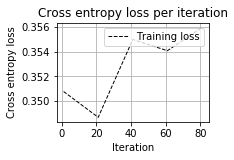

In [32]:
plt.subplot(221)
plt.plot(i_data, cost_list, 'k--', label='Training loss', linewidth=1.0)
plt.title('Cross entropy loss per iteration')
plt.xlabel('Iteration')
plt.ylabel('Cross entropy loss')
plt.legend(loc='upper right')
plt.grid(True)

with open("i_data.txt", "w") as output:
    output.write(str(i_data))

with open("cost_list.txt", "w") as output:
    output.write(str(cost_list))

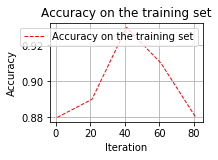

Session closed!


In [33]:
plt.subplot(222)
plt.plot(i_data, acc_list, 'r--', label='Accuracy on the training set', linewidth=1.0)
plt.title('Accuracy on the training set')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

with open("acc_list.txt", "w") as output:
    output.write(str(acc_list))

sess.close()
print("Session closed!")